In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("../DATA/attacks.csv")
df.head()

,Unnamed: 0,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,3,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,4,2018.06.04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex? 

In [4]:
r = df["sex-"].value_counts()
r

M      4939
F       619
M         2
N         2
lli       1
.         1
Name: sex-, dtype: int64

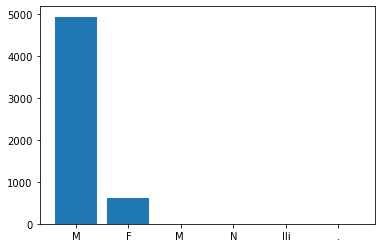

In [5]:
x = r.index
y = r.values

plt.figure()
plt.bar(x,y)
plt.show()

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación. 

In [6]:
nulos = df.isnull().sum()
nulos

case-number         1
unnamed:-0          0
year                0
type                4
country            40
area              408
location          488
activity          511
name              200
sex-              550
age              2666
time             3180
species-         2705
href                0
case-number.2       0
dtype: int64

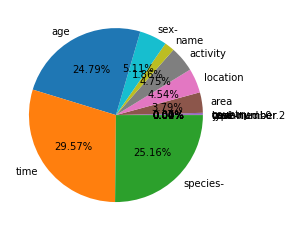

In [7]:
x = nulos.values
labels = nulos.index

plt.figure()
plt.pie(x,labels = labels,autopct="%1.2f%%")
plt.show()

#QUEREMOS PODER VER LA LEYENDA


3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame? 

In [8]:
df.describe(include = object)

,case-number,type,country,area,location,activity,name,sex-,age,time,species-,href,case-number.2
count,6113,6110,6074,5706,5626,5603,5914,5564,3448,2934,3409,6114,6114
unique,6113,8,201,791,4020,1484,5118,6,156,366,1529,6099,6114
top,2018.06.25,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,17,Afternoon,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25
freq,1,4438,2200,1025,162,966,511,4939,154,183,161,4,1


In [ ]:
# mostramos solo el registro de unique:
d = df.describe(include = object)
d.loc['unique'] 

case-number      6113
type                8
country           201
area              791
location         4020
activity         1484
name             5118
sex-                6
age               156
time              366
species-         1529
href             6099
case-number.2    6114
Name: unique, dtype: object

4. Filtrad los datos para quedarnos solo con los datos de USA.
 - ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
 - En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea. 

In [14]:
# ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 
# en adelante.
df[(df["country"] == "USA") & (df["year"] >2000)].shape[0]


959

In [13]:
# En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico 
# de línea. 

tipo = df[(df["country"] == "USA") & (df["year"] >2000)]['type'].value_counts()
tipo

Unprovoked      797
Invalid          65
Provoked         60
Boating          32
Boat              3
Sea Disaster      2
Name: type, dtype: int64

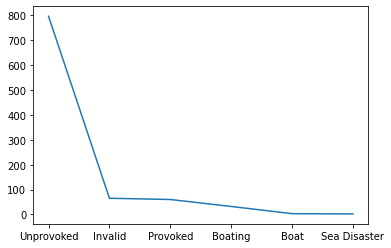

In [18]:
x = tipo.index
y = tipo.values
plt.figure()
plt.plot(x,y)
plt.show()

5. Filtrad los datos para Spain:
 - ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
 - En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea. 

In [20]:
# ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
df[(df["country"] == "SPAIN") & (df["year"] >2000)].shape[0]

16

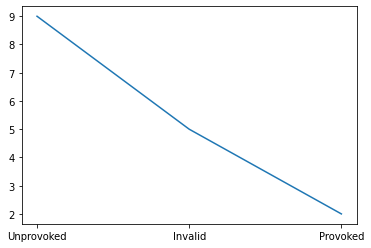

In [21]:
# En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico 
# de línea.
tipo2 = df[(df["country"] == "SPAIN") & (df["year"] >2000)]['type'].value_counts()
tipo2

x = tipo2.index
y = tipo2.values
plt.figure()
plt.plot(x,y)
plt.show()

